<h1 align="center">---- Data Science ----</h1>

----

<b>0) Packages</b>

In [1]:
using Pkg
Pkg.add("Statistics")
Pkg.add("StatsBase")
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("KernelDensity")
Pkg.add("Distributions")
Pkg.add("LinearAlgebra")
Pkg.add("HypothesisTests")
Pkg.add("MLBase")
Pkg.add("RDatasets")

    Updating registry at `C:\Users\gabri\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
  [2913bbd2] + StatsBase v0.33.21
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\gabri\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
   Installed Arpack_jll ──────── v3.5.1+1
   Installed TableOperations ─── v1.2.0
   Installed KernelDensity ───── v0.6.5
   Installed Arpack ──────────── v0.5.4
   Installed StatsPlots ──────── v0.15.4
   Installed MultivariateStats ─ v0.10.1
   Installed DataValues ──────── v0.4.13
    Updating `C:\Users\gabri\.julia\environments\v

In [11]:
using Statistics
using StatsBase
using RDatasets
using Plots
using KernelDensity
using StatsPlots
using Distributions
using LinearAlgebra
using HypothesisTests
using MLBase

----

<b>1) Dataset</b>

In [8]:
# Getting Eruption Data on the Faithfull Geiser
df = dataset("datasets", "faithful")

println("Shape: $(size(df))")
println("Features: $(names(df))")
println("-*-*-*-*-")

df

Shape: (272, 2)
Features: ["Eruptions", "Waiting"]
-*-*-*-*-


Row,Eruptions,Waiting
,Float64,Int64
1,3.6,79
2,1.8,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.7,88
8,3.6,85
9,1.95,51


In [9]:
# Briefly Stats
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,0,Float64
2,Waiting,70.8971,43,76.0,96,0,Int64


In [66]:
# Correlation
cor(eruptions_time, waiting_time)

0.900811168321813

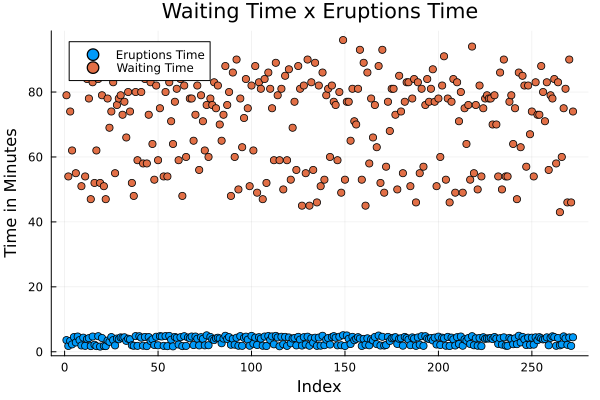

In [18]:
# Scatter Plots - ! selects all rows while filtering the dataset whereas on scatter plots add
# variables to be plotted
eruptions_time  =    df[!, :Eruptions]
waiting_time    =    df[!, :Waiting]

scatter(eruptions_time, label="Eruptions Time")
scatter!(waiting_time, label="Waiting Time")
scatter!(title="Waiting Time x Eruptions Time", xlabel="Index", ylabel="Time in Minutes")

----

<b>2) Plots</b>

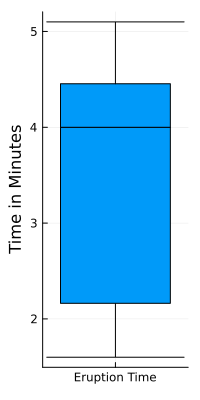

In [34]:
# Boxplot
boxplot(
    ["Eruption Time"]           # x-axis
    , eruptions_time            # data
    , legend=false              # legend
    , size=(200, 400)           # plot size
    , whisker_width=1           # whisker (box) girth
    , ylabel="Time in Minutes"  # y label
)

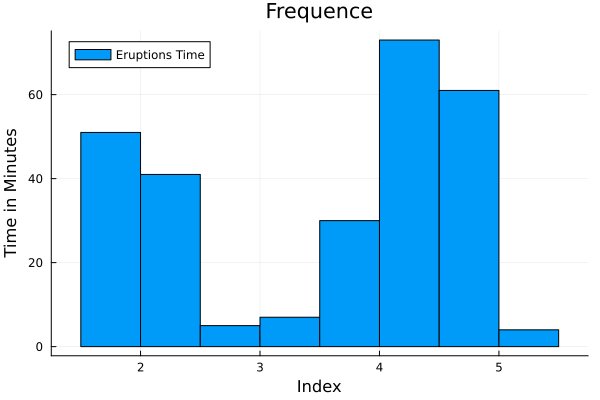

In [41]:
# Histogram
histogram(
    eruptions_time             # data
    , label="Eruptions Time"   # legend label
    , legend=true              # legend
    , title="Frequence"        # title
    , xlabel="Index"           # x-label
    , ylabel="Time in Minutes" # y-label
    , bins=:rice               # bins - can be and integer or 
# some algorithms to automatically calculate the number, such
# as :sturges, :sqrt, :rice, :scott or :fd
)

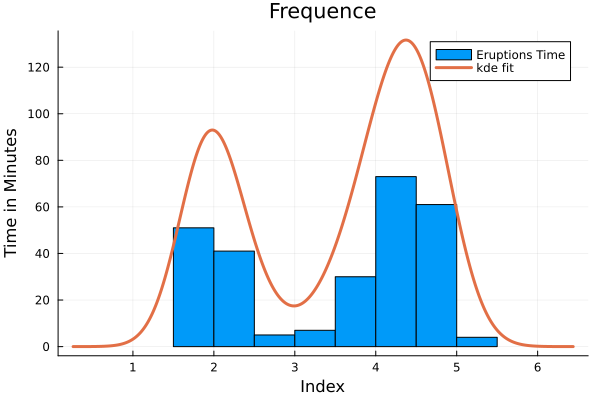

In [56]:
# KDE
eruptions_kde = kde(eruptions_time) # calculating the kdes

histogram(
     eruptions_time           
    , label="Eruptions Time"  
    , legend=true            
    , title="Frequence"       
    , xlabel="Index"         
    , ylabel="Time in Minutes"
    , bins=:rice            
)

plot!(
    eruptions_kde.x   # x-axis values
    , eruptions_kde.density .* length(eruptions_time) # y-axis values (density * number of elements)
    , linewidth=3     # line width
    , color=2         # secondary color (primary >> blue, secondary >> red)
    , label="kde fit" # legend
)

----

<b>3) Hypothesis Testing</b>

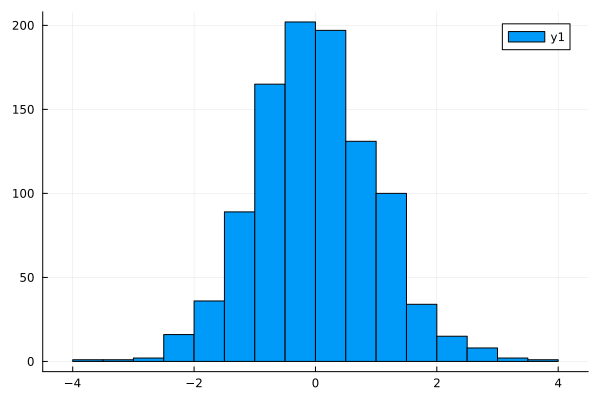

In [64]:
# One Sample TTest
α = randn(1000)
histogram(α) #  normal distribution

In [65]:
OneSampleTTest(α)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.00657173
    95% confidence interval: (-0.05529, 0.06844)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.8349

Details:
    number of observations:   1000
    t-statistic:              0.2084496841710579
    degrees of freedom:       999
    empirical standard error: 0.031526690341097084
